In [1]:
import os
from dn_utils.behavioral_models import load_behavioral_data
from os.path import join
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from dn_utils.misc import tidy_data
from statsmodels.stats.anova import AnovaRM
from dn_utils.style import ORANGE, BLUE

In [2]:
path_root = os.environ.get("DECIDENET_PATH")
path_beh = join(path_root, "data/main_fmri_study/sourcedata/behavioral")

beh, meta = load_behavioral_data(path_beh, verbose=False)
n_subjects, n_conditions, n_trials, _ = beh.shape

In [6]:
rt_index = meta["dim4"].index("rt")
won_bool_index = meta["dim4"].index("won_bool")

rts = np.zeros((n_subjects, n_conditions, 2))

for sub in range(n_subjects):
    for con in range(n_conditions):
        
        won_bool = beh[sub, con, :, won_bool_index]#.astype(bool)
        
#         last_won = won_bool
#         last_lost = 1 - won_bool
        
        last_won = np.hstack(([0], won_bool))[:n_trials].astype(bool)        
        last_lost = np.hstack(([0], 1 - won_bool))[:n_trials].astype(bool)
        
        rts[sub, con, 0] = np.nanmean(beh[sub, con, last_won, rt_index])                
        rts[sub, con, 1] = np.nanmean(beh[sub, con, last_lost, rt_index])        

                   Anova
              F Value Num DF  Den DF Pr > F
-------------------------------------------
con            4.2707 1.0000 31.0000 0.0472
perr_sign      1.6283 1.0000 31.0000 0.2114
con:perr_sign 14.0644 1.0000 31.0000 0.0007



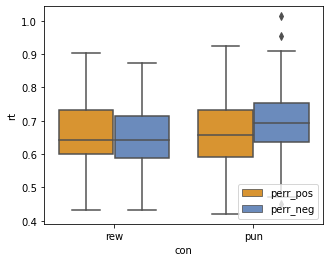

In [7]:
labels = [meta["dim1"], meta["dim2"], ["perr_pos", "perr_neg"]]
palette = {"perr_pos": ORANGE, "perr_neg": BLUE}

depvar = "rt"
data = tidy_data(
    rts,
    depvar=depvar,
    columns=["sub", "con", "perr_sign"],
    labels=labels,
)
anova = AnovaRM(
    data=data, 
    depvar=depvar, 
    subject="sub", 
    within=["con", "perr_sign"]
)
results = anova.fit()
print(results)

fig, ax = plt.subplots(figsize=(5, 4))
sns.boxplot(
    x="con", 
    y=depvar, 
    hue="perr_sign", 
    data=data, 
    ax=ax, 
    palette=palette
)
plt.legend(loc="lower right")
plt.show()